# Data for Classification

#### Import Dependancies

In [1]:
import numpy as np
from utils_common import dlc, plot_data, draw_vthresh, compute_model_output, generate_data
import matplotlib.pyplot as plt


plt.style.use('deeplearning.mplstyle')

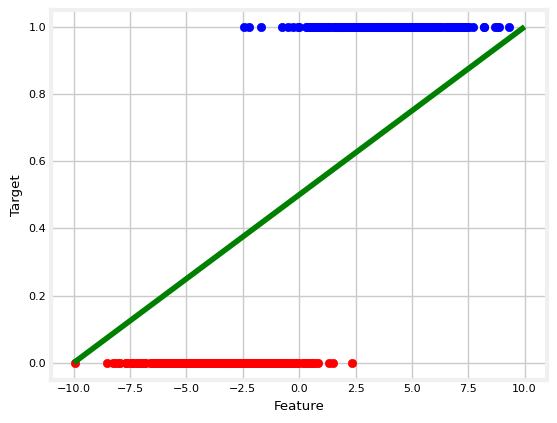

In [2]:
# Can we use Linear Regression for classification?
o = generate_data(-10, 2.5, 0, 0, 300, 0.8)
n = generate_data(-2.5, 10, 1, 1, 300, 0.8)

m = 0.05
b = 0.5
tmp_f_mb = compute_model_output(np.array([-10, 10]), m, b,)

plt.xlabel("Feature")
plt.ylabel("Target")
plt.scatter(o[0], o[1], color='red')
plt.scatter(n[0], n[1], color='blue')
plt.plot(np.array([-10, 10]), tmp_f_mb, c='g',label='Our Prediction')
plt.grid(True)
plt.show()

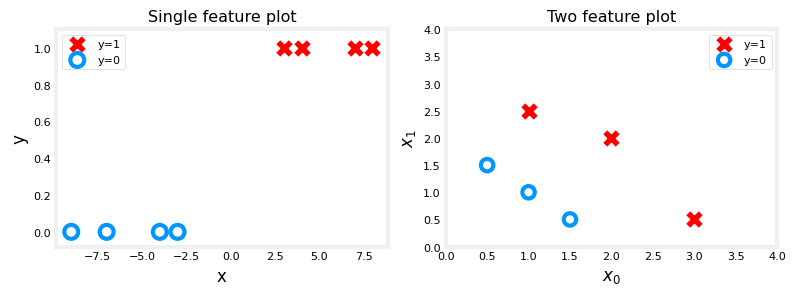

In [3]:
# Visualise classification
x_train = np.array([-3, -4, -7, -9, 3, 4, 7, 8])
y_train = np.array([0, 0, 0, 0, 1, 1, 1, 1])
X_train2 = np.array([[0.5, 1.5], [1, 1], [1.5, 0.5], [3, 0.5], [2, 2], [1, 2.5]])
y_train2 = np.array([0, 0, 0, 1, 1, 1])

pos = y_train == 1
neg = y_train == 0

fig,ax = plt.subplots(1,2,figsize=(8,3))
#plot 1, single variable
ax[0].scatter(x_train[pos], y_train[pos], marker='x', s=80, c = 'red', label="y=1")
ax[0].scatter(x_train[neg], y_train[neg], marker='o', s=100, label="y=0", facecolors='none', edgecolors=dlc["dlblue"],lw=3)

ax[0].set_ylim(-0.08,1.1)
ax[0].set_ylabel('y', fontsize=12)
ax[0].set_xlabel('x', fontsize=12)
ax[0].set_title('Single feature plot')
ax[0].legend()

#plot 2, two variables
plot_data(X_train2, y_train2, ax[1] )
ax[1].axis([0, 4, 0, 4])
ax[1].set_ylabel('$x_1$', fontsize=12)
ax[1].set_xlabel('$x_0$', fontsize=12)
ax[1].set_title('Two feature plot')
ax[1].legend()
plt.tight_layout()
plt.show()

A simple logistic function

$f_{\mathbf{w},b}(\mathbf{x}^{(i)}) = g(\mathbf{w} \cdot  \mathbf{x}^{(i)} + b)$, to predict $y$ given $x$

<span style="color : red">Students are not expected to recall this function, rather they should focus on the underlying concepts of the Logistic Regression algorythm.</span>

| Symbol | |
| --- | --- |
| $f$ | A function indicating a rule that assigns a unique output value (y) for each input value (x) |
| $w$ | Weight is the importance or influence of each feature on the prediction |
| $b$ | Bias is a constant that shifts the decision boundary |
| $x$ | Feature(s) |
| $g$ | The sigmoid function and it maps all input values to values between 0 and 1 |

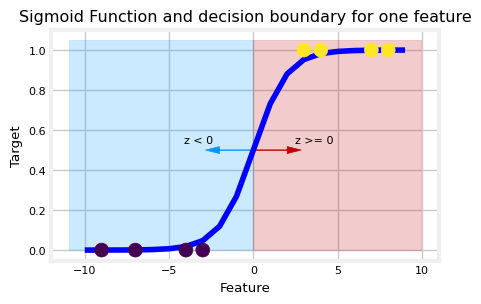

In [4]:
# Sigmoid Function & Decision Boundary
def sigmoid(z):
    g = 1/(1+np.exp(-z))
    return g
z_tmp = np.arange(-10,10)
y = sigmoid(z_tmp)

fig,ax = plt.subplots(1,1,figsize=(5,3))
ax.plot(z_tmp, y, c="b")

ax.set_title("Sigmoid Function and decision boundary for one feature")
ax.set_ylabel('Target')
ax.set_xlabel('Feature')

#ax.scatter(n[0], n[1], color='blue')
ax.grid(True)
draw_vthresh(ax,0)
ax.scatter(x_train, y_train, s=100, c=y_train, zorder=10)
plt.show()

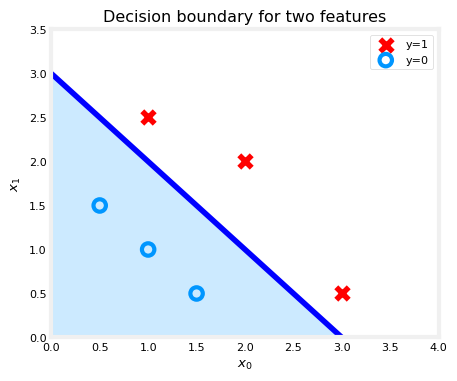

In [5]:
# We can use the sigmoid function to find the decision boundary
# The decision boundary is the line where the output probability is 0.5


x0 = np.arange(0,6)
x1 = 3 - x0
fig,ax = plt.subplots(1,1,figsize=(5,4))
ax.set_title("Decision boundary for two features")
ax.plot(x0,x1, c="b")
ax.axis([0, 4, 0, 3.5])
ax.fill_between(x0,x1, alpha=0.2)
plot_data(X_train2, y_train2,ax)
ax.set_ylabel(r'$x_1$')
ax.set_xlabel(r'$x_0$')
plt.show()

#### Now you have a sigmoid curve that defines a decision boundary, what do you think are the next steps in the Logistic Regression algorythm?

<details>
    <summary><h3 style="display:inline">Optional mathematical functions</h3></summary>

<span style="color : red">Students are not expected to recall or be able to 
calculate these functions, they are shown for those interested in the mathematics of the algorythms.</span>

#### Logistic Lost

$$ \sum_{i=0}^{m-1} - (y _i∗log(p _i)+(1−y _i  )∗log(1−p _i  )) $$

#### Logistic Cost Function

$$ J(\mathbf{w},b) = \frac{1}{m} \sum_{i=0}^{m-1} \left[ loss(f_{\mathbf{w},b}(\mathbf{x}^{(i)}), y^{(i)}) \right] $$

#### Gradient Decent

$$\begin{align*}
&\text{repeat until convergence:} \; \lbrace \\
&  \; \; \;w_j = w_j -  \alpha \frac{\partial J(\mathbf{w},b)}{\partial w_j}   \; & \text{for j := 0..n-1} \\ 
&  \; \; \;  \; \;b = b -  \alpha \frac{\partial J(\mathbf{w},b)}{\partial b} \\
&\rbrace
\end{align*}$$

</details>
